<a href="https://colab.research.google.com/github/Chillboy824/Bryants-Blog/blob/main/Week-04-Exercise01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1DXUVHxd4t15mfuqMgMCLnsP4jWVI5EWz)

---

<br>
© 2022 Copyright The University of New South Wales - CRICOS 00098G

**Author**: Oscar Perez-Concha: o.perezconcha@unsw.edu.au

**Contributors/Co-authors**: Marta Fredes-Torres, Zhisheng (Sandy) Sa and Matthew Sainsbury-Dale.

# Week 4: Tree Based Methods
# Exercise 01: Decision Trees and Gradient Boosting Trees


# 1. Introduction

In this exercise, we will introduce tree based methods. First, we will learn about the basic decision tree, then we will see how decision tree performance can be improved with ensemble methods - specifically, gradient descent boosting.


<b>Goal/Research question:</b> <font color=green> <b> To build a predictive algorithm to predict whether a tumour is malignant based on the measurements of the tissue extracted from the breast. We will choose 2 different algorithms: 1. Decision trees, 2. Gradient boosted classifier</b></font>


## 1.1. Aims of the Exercise:
 1. To introduce the single Decision Tree, as well as the Gradient Boosted Trees.
 2. To explore hyperparameters and determine appropriate choices.


It aligns with all of the learning outcomes of our course:

1.	Distinguish a range of task specific machine learning techniques appropriate for Health Data Science.
2.	Design machine learning tasks for Health Data Science scenarios.


## 1.2. Jupyter Notebook Intructions
1. Read the content of each cell.
2. Where necessary, follow the instructions that are written in each cell.
3. Run/Execute all the cells that contain Python code sequentially (one at a time), using the "Run" button.
4. For those cells in which you are asked to write some code, please write the Python code first and then execute/run the cell.

## 1.3. Tips
1. Run all the cells in sequence (one at a time), using the "Run" button.
2. To edit this notebook, just double-click in each cell. Choose between "Code" cell or text "Markdown" cell in the combo-box above.
3. If you want to save your notebook, please go File->Save a copy on Drive/GitHub.
4. To clean the content of all cells and re-start Notebook, please go to Edit->Clear all outputs then Runtime->Restart untime

Follow the instructions given and if you have any questions, please use the **Comments section** in **Open Learning**.

# 2. Docstring:

Create a docstring with the variables and constants that you will use in this exercise (data dictionary) and the purpose of your program. It is expected that you choose informative variable names and document your program (both docstrings and comments).

<b> Write the answer here:</b>
#####################################################################################################################

(double-click here)


#####################################################################################################################

# 3. Exploration of the Wisconsin Cancer Data Set

The Wisconsin Breast Cancer dataset (cancer, for short) records clinical measurements of breast cancer tumours. Each tumour is labeled as **“benign”** (for harmless tumours) or **“malignant”** (for cancerous tumours), and the task is to learn to predict whether a tumour is malignant based on the measurements of the tissue. These values are contained in the variable 'diagnosis'.

[Read the data dictionary and more information](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

![alt text](https://drive.google.com/uc?export=view&id=1gEuEsg6xZIAErGNiEj2QctybNiXKl3a9)
![alt text](https://drive.google.com/uc?export=view&id=1tIfc3IIwDjboD3YpbmhXRbgOBxSv3M3A)
![alt text](https://drive.google.com/uc?export=view&id=1bgQF4oo6BlIe21jIUGWbhEkhzpNbhbqn)
![alt text](https://drive.google.com/uc?export=view&id=18jDQmeiDk_z06et2HIgCs9Owwddt_oCh)

In [1]:
import sys
import numpy as np
import pandas as pd
from IPython.display import display


In [2]:
# check required libraries are installed if not calling system to install
import sys
import subprocess
import pkg_resources

required = {'numpy', 'pandas', 'plotnine', 'matplotlib', 'seaborn',
            'grid', 'lime', 'shap', 'scikit-learn', 'graphviz'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    print('Installing: ', missing)
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)
# delete unwanted variables
del required
del installed
del missing

Installing:  {'lime', 'shap', 'grid'}


In [3]:
# Mount Google Drive
# We do not need to run this cell if you are not running this notebook in Google Colab

if 'google.colab' in str(get_ipython()):
    from google.colab import drive # import drive from Gogle colab
    root = '/content/drive'     # default location for the drive
    # print(root)                 # print content of ROOT (Optional)
    drive.mount(root)
else:
    print('Not running on CoLab')

Mounted at /content/drive


In [4]:
from pathlib import Path

if 'google.colab' in str(get_ipython()):
    # EDIT THE PROJECT PATH IF DIFFERENT WITH YOUR ONE
    project_path = Path(root) / 'MyDrive' / 'HDAT9500' / 'week04'

    # OPTIONAL - set working directory according to your google drive project path
    # import os
    # Change directory to the location defined in project_path
    # os.chdir(project_path)
else:
    project_path = Path()

In [6]:
# Load the Wisconsin Cancer Data set

data_path = Path(project_path) / 'data.csv'
cancer = pd.read_csv(data_path, sep=',')

# Check:
display(cancer[:][:5])
print(cancer.shape)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 32)


**We drop the 'id' since we won't use it for our models**

In [7]:
# Drop 'id' variable
cancer = cancer.drop(['id'],axis=1)
display(cancer[:][:5])

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Summary stats regarding diagnosis**

In [8]:
# Summary of the features regarding patients with diagnosis = 'benign'
cancer[cancer['diagnosis'] == 'B'].describe(include='all')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,357,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,NaN,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,NaN,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,NaN,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,NaN,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410


In [9]:
# Summary of the features regarding patients with diagnosis = 'malignant'
cancer[cancer['diagnosis'] == 'M'].describe(include='all')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,NaN,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,NaN,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,NaN,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,NaN,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,NaN,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625


## 3.1 Visualising the features and the response
We start visualizing the first 5 features.

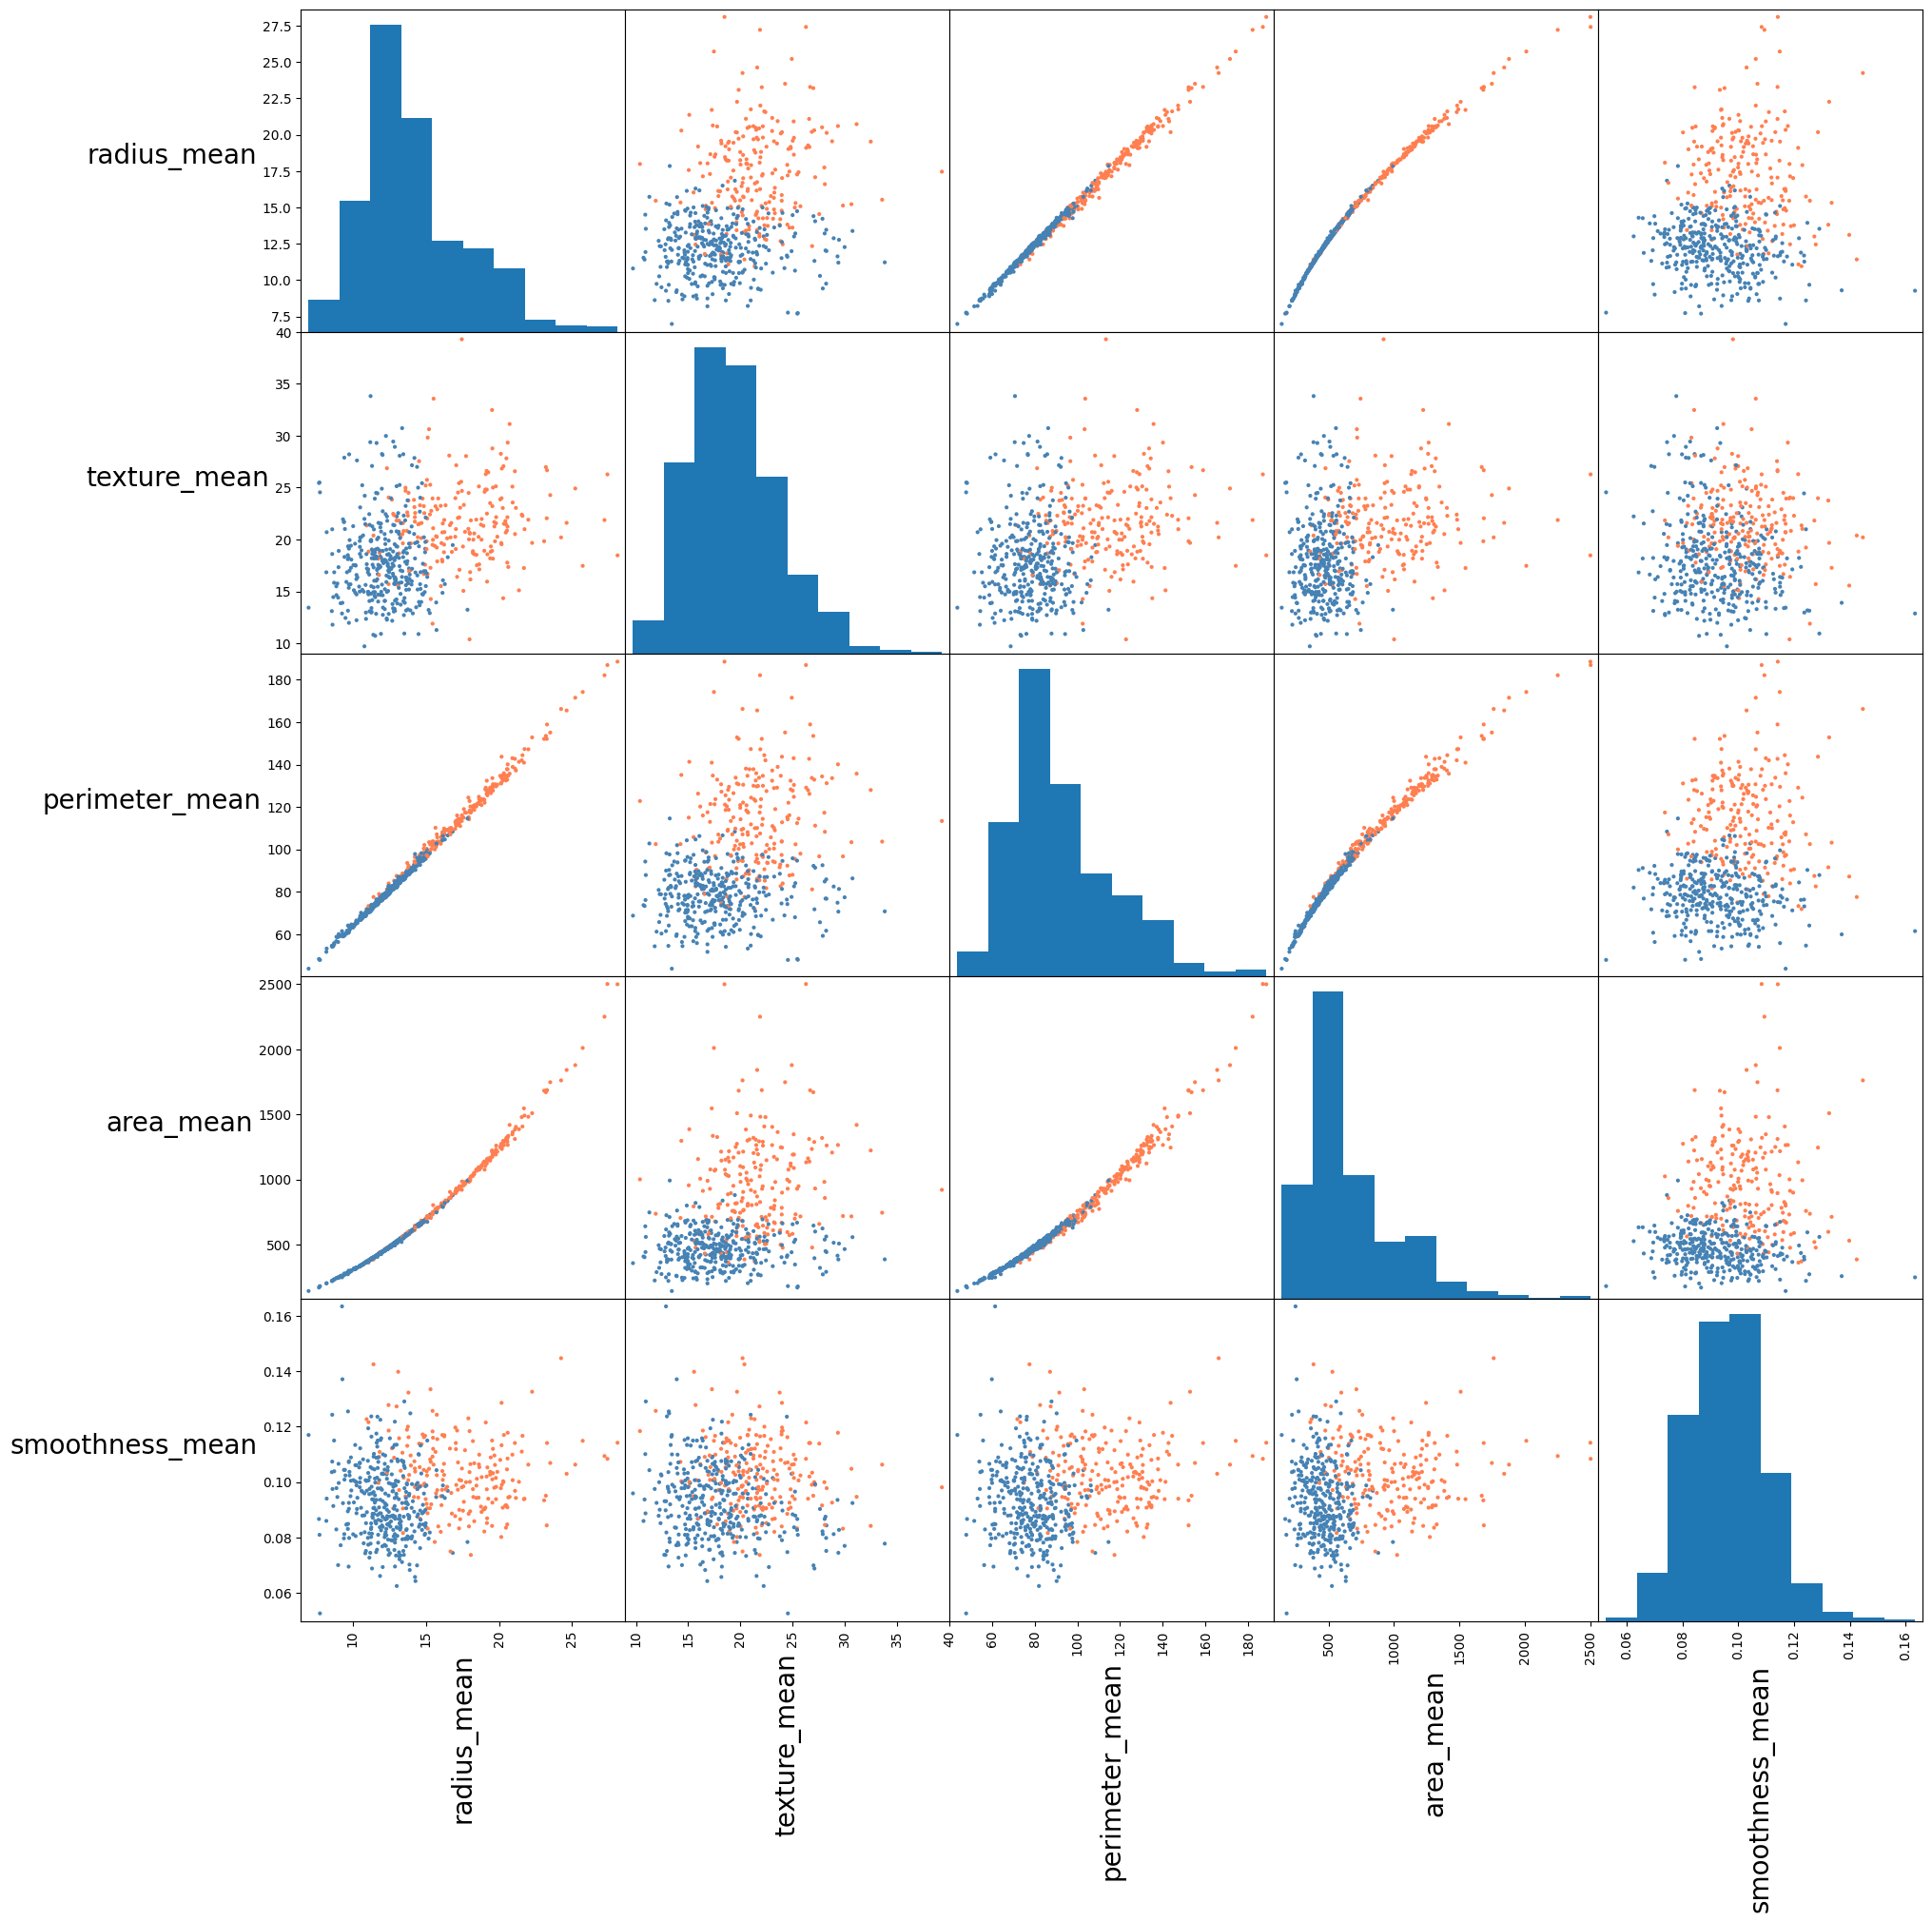

In [10]:
import matplotlib.pyplot as plt
# help: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html
color = cancer.diagnosis.map({'B':'steelblue', 'M':'coral'})
sm=pd.plotting.scatter_matrix(cancer.iloc[:, 0:6], c=color, alpha=1, figsize=(22,22));

# Change labels and tickslabels sizes:
# help: https://matplotlib.org/api/text_api.html#matplotlib.text.Text

#y ticklabels
a=[plt.setp(item.yaxis.get_majorticklabels(), 'size', 10) for item in sm.ravel()]
#x ticklabels
b=[plt.setp(item.xaxis.get_majorticklabels(), 'size', 10) for item in sm.ravel()]
#y labels
c=[plt.setp(item.yaxis.get_label(), 'size', 20) for item in sm.ravel()]
#x labels
d=[plt.setp(item.xaxis.get_label(), 'size', 20) for item in sm.ravel()]

for ax in plt.gcf().axes:
    plt.sca(ax)
    plt.xlabel(ax.get_xlabel(), rotation=90)
    plt.ylabel(ax.get_ylabel(), rotation=0, horizontalalignment='right')

#### Correlation amongst <font color=green> continous</font> features:

<ipython-input-11-d2d9d43573bf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cancer.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


<Axes: >

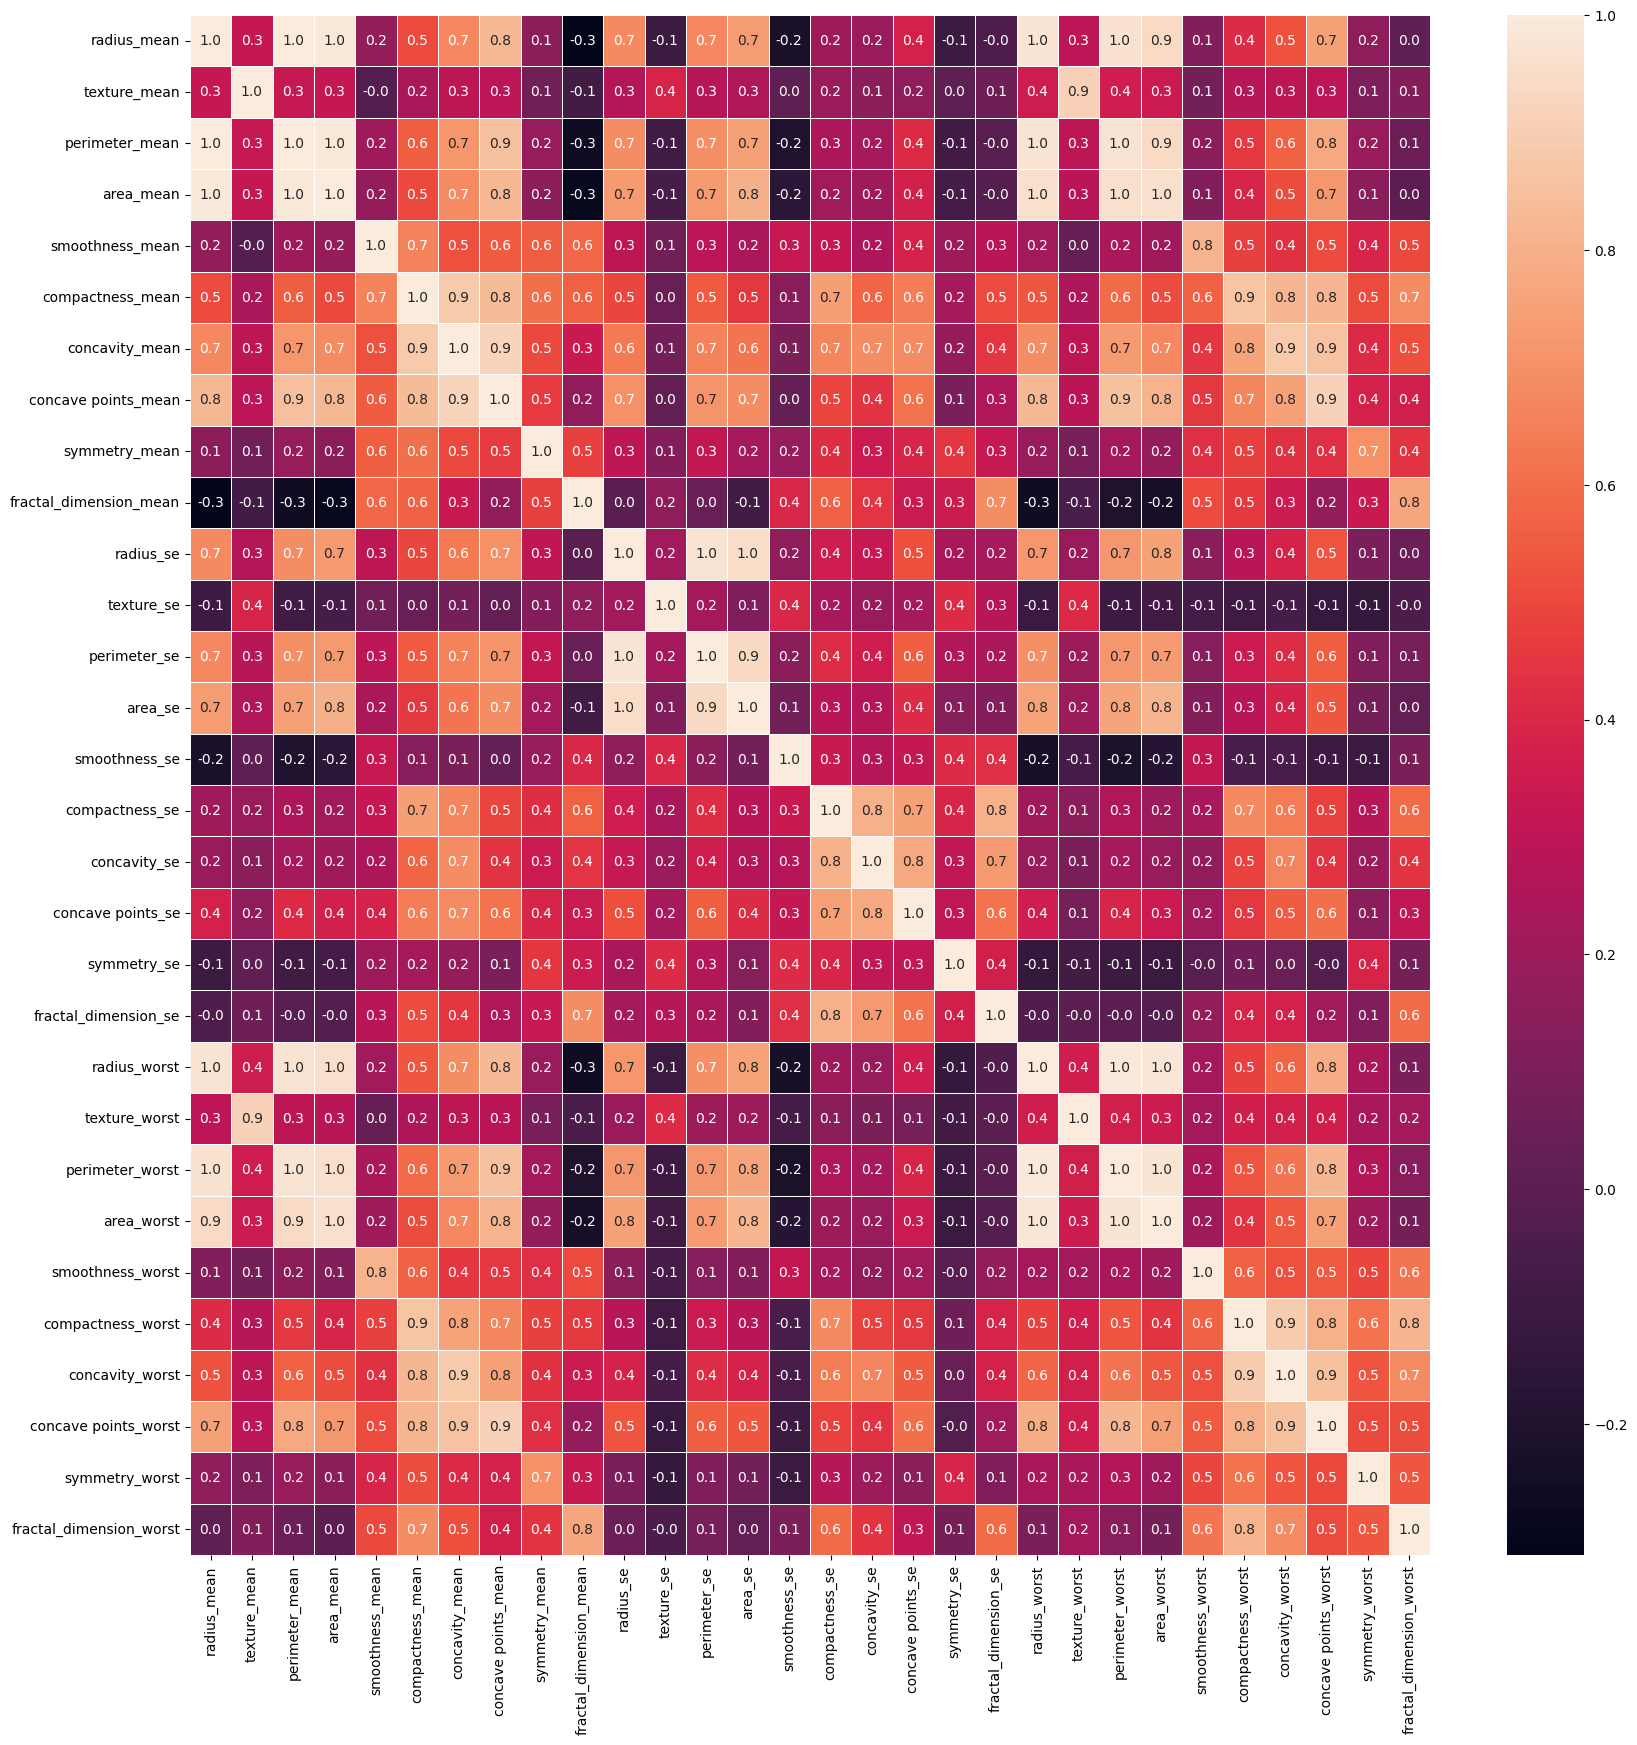

In [11]:
import seaborn as sns
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(cancer.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### <font color='brown'> Question 1: Observe the previous graph and annonate which pairs present linear correlation higher or equal to 0.5. For example, the pair (radious_mean, perimeter mean).  </font>

<b> Write your answer here:</b>
#####################################################################################################################



#####################################################################################################################

#### Visualisation of the response variable ('diagnosis')

Number of Benign:  357
Number of Malignant :  212


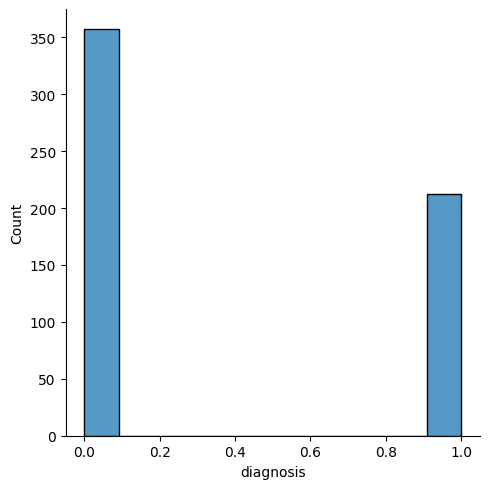

In [16]:
ax = sns.displot(cancer.diagnosis,label="Count")       # M = 212, B = 357
B, M = cancer.diagnosis.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

As we can see, this dataset is not as imbalanced as the "diabetes" dataset.

**Boxplot of continuous variables regarding 'diagnosis'**

In [ ]:
# Transforming our data from wide to long format for our plots. Python command: DataFrame.melt([group variable],var_name,value_name)
cancer_plot = cancer.melt(['diagnosis'], var_name='cols',  value_name='vals')
cancer_plot.sort_values('diagnosis', inplace=True)

In [ ]:
pal = dict(M="coral", B="steelblue")   # Palette of colours

# Box plot of all the continuous/numeric variables regarding 'diagnosis'
p = sns.axisgrid.FacetGrid(cancer_plot, col='cols', palette=pal, sharey=False, col_wrap=4)
p = (p.map(sns.boxplot, 'diagnosis','vals', palette=pal, notch=True))
p.fig.set_size_inches(15,30)

# 4. Data Preparation
## 4.2 Split the data into features and response
We split the cancer data set into two DataFrames: the features, stored in X, and the target, stored in y.

In [ ]:
X = cancer.drop(axis=1, columns=['diagnosis'])
y = cancer[['diagnosis']].values

In [ ]:
# Sanity check
#display(X[:][:5])
#display(y[:][:5])

## 4.3. Split the data into training and test sets

Now let's split the data into a training and test set. We will include the optional argument `stratify = y` to preserve the ratio between diagnosis = B to diagnosis = M.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size = 0.20)

# 5. Decision Trees
Decision Trees involve segmenting the feature space (the space of our predictor variables) into a number of different regions. The method can be used for both regression (predicting numeric response variable) and classification (classifying a categorical response variable). As the set of rules splitting the feature space into segments, this process can be summarised into a hierarchy of if/else statements in the form of a tree, these types of approaches are known as decision tree methods. Check the documentation to get familiar with [Decision Trees](https://scikit-learn.org/stable/modules/tree.html).

We will use tree methods to predict cancer diagnosis, which is a classification task.

## 5.1 Growing a simple decision tree
Beginning with what is known as the *root node*, the node containing the entire dataset, we split the data based on the feature that provides the most information about the response variable. The split is achieved by using a *test*. The form of the test depends on the data type of the chosen feature.
* If the feature of choice is continuous, the test will be of the form $X_i > a$, where $a$ is some constant. In other words, the tests that are used on continuous data are of the form 'is feature $X$ value larger than the value $a$?'.
* If the feature is categorical, the test will be $X_i = c$, where $c$ is one of the levels of the categorical variable. In other words, the tests that are used on categorical data are of the form 'is feature i of the same level as $c$?'. <p>

After assessing the test, the result will be two *children nodes*, one node being for all the data that satisfy the root node test and one node for all data points that do not satisfy the root node test.<p>
    We then continue this process of finding informative rules and splitting the data. Resulting in a tree of nodes. The nodes in which we assign a value to the given observations are known as *leaf nodes*.

## 5.2 Reguralization: Avoiding over-fitting - pruning the tree

We used Ridge and Lasso to avoid over-fitting in the case of linear models. We can't use these techniques here. So, what shall we do?

If we allow the process of testing and splitting to continue indefinitely, we will have a tree with every leaf node being *pure*. *Pure* means that there are only data points of a single class label in the final leaf node. More often than not, such a tree will be very complex and highly over-fitted to the training data. There are two common methods to prevent over-fitting:

1. **Pre-pruning**: Preventing over-fitting prior to the creation of a tree. Common criteria for pre-pruning includes limiting the maximum depth of the tree, limiting the maximum number of leaves, or placing a minimum size constraint on the nodes that must be satisfied for a split to occur. Is this familiar? How shall we determine these values, for example, the maximum depth of the tree? Yes, correct, you already know that these are hyperparameters and as such, they are set up by the user and they can be tuned if we wish to do so.

2. **Post-pruning**: Removing over-fitted leaf nodes after the creation of the tree. This is commonly referred to as "pruning". <p>

Decision trees in scikit-learn are implemented in the **DecisionTreeRegressor** and **DecisionTreeClassifier** classes. **scikit-learn** only implements pre-pruning, not post-pruning.

## 5.3 Create a decision tree with no pruning

We will create a decision tree with no pruning first. We will see that some of the nodes will have only 1 sample.

Read [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
simple_decision_tree = DecisionTreeClassifier(random_state=0)
simple_decision_tree.fit(X_train, y_train)

In [ ]:
print("Accuracy on training set: {:.3f}".format(simple_decision_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(simple_decision_tree.score(X_test, y_test)))

### 5.3.1 Confusion Matrix

In [ ]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = simple_decision_tree.predict(X_test)
cancer_labels = ['M', 'B']

# Confusion Matrix
cm = metrics.confusion_matrix(y_true = y_test, y_pred = y_pred, labels=cancer_labels)

# Visualising the confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', ax= ax, cmap="viridis")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['M', 'B']); ax.yaxis.set_ticklabels(['M', 'B'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

### 5.3.2 Visualisation

See [graphviz documentationn](https://graphviz.readthedocs.io/en/stable/) for install instruction if you are running a Python version < 3.7

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(simple_decision_tree, out_file='tree.dot', class_names=["malignant", "benign"],
                feature_names=X.columns, impurity=False, filled=True)

import graphviz
import os

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 5.4 Pre-pruning a tree
As mentioned previously, scikit-learn only implements pre-pruning, not post-pruning, so we will only demonstrate how pre-pruning works.<p>
    Now let’s apply pre-pruning to the tree, which will stop growing the tree before we perfectly fit it to the training data.

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='brown'> Question 2: Set the maximum depth equal to 3, meaning only 3 consecutive splits can be made. Fit the model and print the accuracy on the training and test set. </font>

In [ ]:
# Write Python Code here
decision_tree_max_depth3 =


<div class="alert alert-block alert-warning">**End Activity**</div>

### 5.4.1 Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_max_depth3 = decision_tree_max_depth3.predict(X_test)
cancer_labels = ['M', 'B']

# Confusion Matrix
cm_max_depth3 = confusion_matrix(y_true = y_test, y_pred = y_pred_max_depth3, labels=cancer_labels)

# Visualising the confusion matrix
ax= plt.subplot()
sns.heatmap(cm_max_depth3, annot=True, fmt='.0f', ax= ax, cmap="viridis")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['M', 'B']); ax.yaxis.set_ticklabels(['M', 'B'])

Interpretation of the confusion matrix:

![alt text](https://drive.google.com/uc?export=view&id=1Sj1gsulVbbBRjDqGgtS8j6PmaEqW_tfN)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_max_depth3))

### 5.4.2 Visualisation

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree_max_depth3, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=X.columns, impurity=False, filled=True)


import graphviz
import os
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

The visualisation of the tree allows for an intuitive interpretation on how the algorithm classifies its data.<p>

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='brown'> Question 3: Did we improve our accuracy / precision-recall? Why? </font>

<b> Write your answer here:</b>
#####################################################################################################################



#####################################################################################################################

<div class="alert alert-block alert-warning">**End Activity**</div>

### 5.4.3 Feature importance
There are some useful properties that we can derive to summarise the workings of the tree. A common example is *feature importance*, which as its name suggests, numerically rates the importance each feature plays in the decision making process of the tree. It is a number between 0 and 1, with the sum of all feature importances equalling to 1.

In [ ]:
# Creating DataFrame with the features names and features importance
F_importance = pd.concat([pd.DataFrame(X.columns,columns=['Features']),
                  pd.DataFrame(np.transpose(decision_tree_max_depth3.feature_importances_),columns=['Feature Importance'])],
                 axis = 1)

# Sorting new DataFrame by feature importance (Sort Descending)
F_importance = F_importance.sort_values(by='Feature Importance', ascending=False)
F_importance

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (7,8)
    # Sort feature importances in ascending order
    indices = np.argsort(model.feature_importances_)

    # Rearrange feature names so they match the sorted feature importances
    columns_name = [X.columns[i] for i in indices]

    # Create plot
    plt.figure()
    plt.title("Feature Importance")
    plt.xlabel("Feature")
    plt.ylabel("Feature Importance")
    plt.barh(range(X.shape[1]), model.feature_importances_[indices])
    plt.yticks(range(X.shape[1]), columns_name)
    plt.show()

In [ ]:
plot_feature_importances(decision_tree_max_depth3)

This is not an effective visualisation, as we have many features. Therefore we remove all features that showed very low importance. We = only select the most important features, i.e. the top six.

In [ ]:
def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (6,4)
    #locate indices of the features with feature importance greater than 0.01. Sort descending
    indices = np.argsort(decision_tree_max_depth3.feature_importances_)
    indices = indices[-6:]

    # Rearrange feature names so they match the sorted feature importances
    columns_name = [X.columns[i] for i in indices]

    #extract the number of features that have non-zero feature importance
    n_features = X.iloc[:,indices].shape[1]

    # Create plot
    plt.figure()
    plt.title("Feature Importance")
    plt.xlabel("Feature")
    plt.ylabel("Feature Importance")
    plt.barh(range(n_features), model.feature_importances_[indices])
    plt.yticks(range(n_features), columns_name)
    plt.show()

In [ ]:
plot_feature_importances(decision_tree_max_depth3)

From the Introduction to machine learning with Python : a guide for data scientists by Andreas C. Müller and Sarah Guido: **"... if a feature has a low feature_importance, it doesn’t mean that this feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information."**

## 5.5 Advantages/disadvantages of decision trees
**Advantages**:
* Easy interpretation and visualisation of decision rules. Particularly to non-experts.
* Very fast to train, and then predict.
* Invariant to scaling of the data. This removes the need for preprocessing such as the standardisation which was needed for the regularised logistic models.
* Are able to predict non-linear data.
* Can be used to determine feature importance.
* Further, provides automatic feature selection by only choosing the important features by which the data are split. This further reduces the need for preprocessing.
* Provides probability estimates. <p>

**Disadvantages**:
* Tendency to over-fit, even after pruning methods.
* Often outperformed by other models, including the ensemble methods utilising the basic decision tree, which we will discuss now.

# 6. Gradient Boosted Decision Trees
Gradient Boosted Decision Trees are an *ensemble* of decision trees. *Ensemble* is a general term referring to methods that combine multiple machine learning models to create a more powerful model. There are two widely used ensembles based on decision trees: *Gradient Boosted Decision Trees*, and *Random Forests*. Here, we will introduce Gradient Boosted Decision Trees.<p>

Gradient boosting works by building a large number of trees where each tree tries to correct the mistakes of the previous one. The way this is achieved is by fitting each subsequent tree on a modified version of the original dataset, depending on how the previous trees performed. Given the current model, we fit a decision tree with the residuals (the unexplained variation) from the model. That is, we fit a new tree using the current residuals, rather than the whole outcome Y, as the outcome. We then add this new decision tree into the fitted function in order to update the residuals.<p>

Readings and videos:
1. [Scikit-learn API](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
2. [Video 1: Regression](https://www.youtube.com/watch?v=3CC4N4z3GJc)
3. [Video 2: Classification](https://www.youtube.com/watch?v=jxuNLH5dXCs)

**Let's first binarise the response**

In [ ]:
# y_train and y_test binary
y_train_binary = [0 if x =='M' else 1 for x in y_train]
y_test_binary = [0 if x =='M' else 1 for x in y_test]

We are going to create the `gbt` object *that encapsulates the algorithm that will be used to build the model from
the training data, as well the algorithm to make predictions on new data points. It will
also hold the information that the algorithm has extracted from the training data* (source: Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn and TensorFlow. Chapter 1).

In [ ]:
import warnings; warnings.simplefilter('ignore')
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbt = GradientBoostingClassifier(random_state=0)

In [ ]:
gbt.fit(X_train, y_train_binary)

*The fit method returns the object itself (and modifies it in place), so we get a string representation of our classifier. The representation shows us which parameters were used in creating the model. Nearly all of them are the default values, but you can also find `random_state=0`, which is a hyper-parameter that we passed. Most models in scikit-learn have several hyper-parameters, but many of them are either speed optimisations or for very special use cases*. (source: Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn and TensorFlow. Chapter 1).

Let's calculate accuracy for the training and test set:

In [ ]:
print("Accuracy on training set: {:.3f}".format(gbt.score(X_train, y_train_binary)))
print("Accuracy on test set: {:.3f}".format(gbt.score(X_test, y_test_binary)))

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_gbt = gbt.predict(X_test)
cancer_labels = ['M', 'B']

# Confusion Matrix
cm_gbt = confusion_matrix(y_true = y_test_binary, y_pred = y_pred_gbt)

# Visualising the confusion matrix
ax= plt.subplot()
sns.heatmap(cm_gbt, annot=True, fmt='.0f', ax= ax, cmap="viridis")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['M', 'B']); ax.yaxis.set_ticklabels(['M', 'B'])

Interpretation of the confusion matrix:

![alt text](https://drive.google.com/uc?export=view&id=1Sj1gsulVbbBRjDqGgtS8j6PmaEqW_tfN)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binary, y_pred_gbt))

## 6.1 Hyperparameters
In terms of hyperparameters, we have the previous ones such as **depth of the tree**, **maximum number of leaves**, and **minimum splitting size**. However,  there is **no hyperparameter for 'class_weight'** in gradient boosting trees for sklearn.  <p>
    We also have two new hyperparameters:
* `n_estimators`, the number of trees in the ensemble. Increasing n_estimators in gradient boosting leads to a more complex model, which may lead to over-fitting
* `learning_rate`. The learning rate controls how strongly each tree tries to correct the mistakes of the previous trees. Learning_rate is a decimal number between 0 and 1, with low values indicating slow learning and higher values indicating fast learning.

Ideally, we would like to tune all the hyperparameters. However, as we are restrained by both time and computational power, we will restrict ourselves to tuning only the `n_estimator`, `max_leaf_nodes` and `learning_rate`. The hyperparameters `n_estimator` and `learning_rate` are highly interconnected, as a lower `learning_rate` means that more trees are needed to build a model of similar complexity. Using this knowledge, we will choose a value of `n_estimators` that is feasible given our time and computational power constraints, and then find the best `learning_rate` given this value of `n_estimators`.

## 6.2 Grid search
Here, we will attempt to find the hyperparameters that maximise the f1 score, macro averaged.
We are going to create the `gbt_gridsearch` object that encapsulates the machine learning algorithm that will use. But in this case, we will use this algorithm along with `GridSearchCV`. Let's see

In [ ]:
gbt_gridsearch = GradientBoostingClassifier(random_state=0)

### 6.2.1 First search

Let's define the parameters grid.

In [ ]:
param_grid = {'n_estimators': [15, 25, 50, 100],
              'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'max_leaf_nodes': [2,5,10,15]}

Now we initialise the GridSearchCV class, that is, we create a new object `grid_search`. This is the object that we are going to `.fit()`, as well the object to make predictions on new data points `.predict()`.
How are we going to build this object? By passing it the gradient boosted tree object we have created before, `gbt_gridsearch`, our paramater grid, `param_grid`, and specifying how many folds we would like. We must consider the computational complexity of the algorithm, so we can't set cv too high. We choose 5 folds. We also specify `scoring = 'f1'` to designate that we would like to use the F1 measure with an unweighted average of the classes.

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(gbt_gridsearch, param_grid=param_grid, cv=5, scoring = 'f1')

We then fit the grid search.

*Fitting the GridSearchCV object not only searches for the best parameters, but also
automatically fits a new model on the whole training dataset with the parameters that
yielded the best cross-validation performance [...]*

*The GridSearchCV class provides a very convenient interface to access the retrained
model using the predict and score methods.*

(source of the two previous paragraphs: Chapter 5 of the book "Introduction to machine learning with Python : a guide for data scientists by Andreas C. Müller and Sarah Guido. Sebastopol, CA, O'Reilly Media, Inc, 2017").

In [ ]:
grid_search.fit(X_train, y_train_binary)

*The important thing here is that we did not use the test set to choose the parameters. The parameters that were found are scored in the `best_params_` attribute, and the best cross-validation accuracy (the mean accuracy
over the different splits for this parameter setting) is stored in `best_score_`* (source: Chapter 5 of the book "Introduction to machine learning with Python : a guide for data scientists by Andreas C. Müller and Sarah Guido. Sebastopol, CA, O'Reilly Media, Inc, 2017")

In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation average f1 score: {:.2f}".format(grid_search.best_score_))

As we can see, the best parameters for our model are: **'learning_rate': 0.4, 'max_leaf_nodes': 2 and 'n_estimators': 100**


*Again, be careful not to confuse `best_score_` with the generalisation
performance of the model as computed by the score method
on the test set. Using the score method (or evaluating the output of
the predict method) employs a model trained on the whole training
set. The `best_score_` attribute stores the mean cross-validation
accuracy, with cross-validation performed on the training set.* (source: Chapter 5 of the book "Introduction to machine learning with Python : a guide for data scientists by Andreas C. Müller and Sarah Guido. Sebastopol, CA, O'Reilly Media, Inc, 2017")

**To have greater clarity of our results, we proceed to analyse the heatmap.**

Let's first visualise the mean cross-validation f1-score as a function of the parameters `max_leaf_nodes` and `learning_rate`.

In [ ]:
import warnings; warnings.simplefilter('ignore') #prevent warnings

# Creating DataFrame with GridSearchCV results. df stands for Dataframe
df_gridsearch = pd.DataFrame(grid_search.cv_results_).drop(columns='params')

max_scores = df_gridsearch.groupby(['param_max_leaf_nodes',
                                    'param_learning_rate']).max()
max_scores = max_scores.unstack()[['mean_test_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.3g')

Each cell represents the mean f1-score, the mean over all the 5 models created in the 5-CV. Lighter colors correspond to better accuracy and dark colors to the contrary. In our case, the optimal values for learning rate and maximum leaf nodes are 0.4 and 2.

Let's visualise the mean cross-validation f1-score as a function of the parameters 'n_estimators' and 'learning_rate'.

In [ ]:
df_gridsearch = pd.DataFrame(grid_search.cv_results_).drop(columns='params')

max_scores = df_gridsearch.groupby(['param_n_estimators',
                                    'param_learning_rate']).max()
max_scores = max_scores.unstack()[['mean_test_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.3g')

The procedure **`.score()`** will display F1 score of the positive class because we changed the **`scoring='f1'`** in the GridSearchCV function.

In [ ]:
print("Test set F1: {:.2f}".format(grid_search.score(X_test, y_test_binary)))

In this case, in order to print accuracy,

In [ ]:
# Let's predict in the training set, in order to calculate accuracy in the training set too, to see if our model is overfitted.
y_pred_grid_search_training_set= grid_search.predict(X_train)

# We predict in the test set
y_pred_grid_search = grid_search.predict(X_test)


from sklearn.metrics import accuracy_score
print("Accuracy on training set: {:.2f}".format(accuracy_score(y_train_binary, y_pred_grid_search_training_set)))
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test_binary, y_pred_grid_search)))

In [ ]:
from sklearn.metrics import confusion_matrix

cancer_labels = ['M', 'B']

# Confusion Matrix
cm_grid_search = confusion_matrix(y_true = y_test_binary, y_pred = y_pred_grid_search)

# Visualising the confusion matrix
ax= plt.subplot()
sns.heatmap(cm_grid_search, annot=True, fmt='.0f', ax= ax, cmap="viridis")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['M', 'B']); ax.yaxis.set_ticklabels(['M', 'B'])

Interpretation of the confusion matrix:

![alt text](https://drive.google.com/uc?export=view&id=1Sj1gsulVbbBRjDqGgtS8j6PmaEqW_tfN)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binary, y_pred_grid_search))

### 6.2.2 Second search

We will perform a second search defining a new parameter grid including different values **close** to the optimal values found in the previous step.

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='brown'> Question 4: Define a second search with different values close to the optimal learning rate and number of estimator values found in the previous section.</font>

The optimal values found in the first search were 0.4 for learning rate, 2 for maximum leaf nodes and 100 for the number of estimators. Thus, we define values in the vicinity of 0.4 for learning rate and in the vicinity of 100 for the number of estimators, just to test if we can find some parameters that perform better. We set the maximum leaf nodes to 2, as it is the best value found before.

In [ ]:
# Write Python Code Here:
param_grid_in_detail =

### <font color='brown'> Question 5: Define the variable grid_search in which we will do "GridSearchCV" with CV=5 and for the f1 score </font>

In [ ]:
# Write Python Code Here:
grid_search_in_detail =

### <font color='brown'> Question 6: "Fit" the models </font>

In [ ]:
# Write Python Code Here:


### <font color='brown'> Question 7: Print the best hyperparameters and visualise them on a heatmap. </font>

In [ ]:
# Write Python Code Here:


<div class="alert alert-block alert-warning">**End Activity**</div>

## 6.3 Fit and evaluate the gradient boosted tree with our optimal hyperparameters

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='brown'> Question 8: Train the new classifier with the best hyperparameters found above </font>

<font color=green>**This question is a tricky one and that's why we have the answer here. There is no need to train a new model!!!**</font>

From Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems by Géron, Aurélien, Chapter 5
```
grid_search.fit(X_train, y_train)
```
Fitting the GridSearchCV object not only searches for the best parameters, but also
automatically fits a new model on the whole training dataset with the parameters that
yielded the best cross-validation performance. What happens in fit is therefore
equivalent to the result of the code we saw at the beginning of this section. The
GridSearchCV class provides a very convenient interface to access the retrained
model using the predict and score methods. To evaluate how well the best found
parameters generalise, we can call score on the test set as follows:

Bear in mind, that "score" will display F1 (and not accuracy) because we changed it in the GridSearchCV

In [ ]:
# We can predict directly:
print("Test set F1: {:.2f}".format(grid_search_in_detail.score(X_test, y_test_binary)))

### <font color='brown'> Question 9: Compute the confusion matrix </font>

In [ ]:
# Write Python Code Here:


Interpretation of the confusion matrix:

![alt text](https://drive.google.com/uc?export=view&id=1Sj1gsulVbbBRjDqGgtS8j6PmaEqW_tfN)

As you can see, the model improved a little after tuning several hyper-parameters.
Feel free to try new hyper-parameters.

<div class="alert alert-block alert-warning">**End Activity**</div>

## 6.4 Visualising the gradient boosted tree: feature importance

Remember:

You can access the model with the
best parameters trained on the whole training set using the `best_estimator_`.

We know that the best model found by GridSearchCV, **trained on all the training data**, is stored in grid.`best_estimator_`:

```print("Best estimator:\n{}".format(grid.best_estimator_))```

In [ ]:
def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (7,8)
    # Sort feature importances in ascending order
    indices = np.argsort(model.feature_importances_)

    # Rearrange feature names so they match the sorted feature importances
    columns_name = [X.columns[i] for i in indices]

    # Create plot
    plt.figure()
    plt.title("Feature Importance")
    plt.xlabel("Feature")
    plt.ylabel("Feature Importance")
    plt.barh(range(X.shape[1]), model.feature_importances_[indices])
    plt.yticks(range(X.shape[1]), columns_name)
    plt.show()

In [ ]:
plot_feature_importances(grid_search_in_detail.best_estimator_)

This is not an effective visualisation, as we have so many features. The solution is to remove all features that are of very low importance. We will only plot the most important features. <p>
Notice that almost all the features have a non-zero importance. This is in contrast to the regular decision tree.

In [ ]:
def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (6,4)
    #locate indices of the features with feature importance greater than 0.01. Sort descending
    indices = np.argsort(model.feature_importances_)
    indices = indices[-17:]

    # Rearrange feature names so they match the sorted feature importances
    columns_name = [X.columns[i] for i in indices]

    #extract the number of features that have non-zero feature importance
    n_features = X.iloc[:,indices].shape[1]

    # Create plot
    plt.figure()
    plt.title("Feature Importance")
    plt.xlabel("Feature")
    plt.ylabel("Feature Importance")
    plt.barh(range(n_features), model.feature_importances_[indices])
    plt.yticks(range(n_features), columns_name)
    plt.show()

In [ ]:
plot_feature_importances(grid_search_in_detail.best_estimator_)

## 6.6 Advantages/disadvantages of gradient boosted trees
**Advantages**:
* Can be very powerful, provided the parameters are tuned correctly
* Build trees one at a time, where each new tree helps to correct errors made by previously trained trees

**Disadvantages**:
* Requires careful tuning of the parameters
* Longer time to train, because trees are built sequentially
* Long time to predict
* Can be susceptible to overfitting

© 2022 Copyright The University of New South Wales - CRICOS 00098G
